In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import nasapy
import nasa



from api_keys import api_key


In [104]:
Asteroids = pd.read_csv("Asteroid_dates.csv")
Asteroids

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,1/01/2019,Jan,1,3837557,(2019 AN),24.200,8.368577,1/01/2019,0.085909,0.038420,False,1.910837e+07,Earth
1,1/01/2019,Jan,1,3398654,(2007 YS56),25.700,6.461135,1/01/2019,0.043057,0.019256,False,1.798761e+07,Earth
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.900,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
3,1/01/2019,Jan,1,3837538,(2018 YV2),24.200,11.718652,1/01/2019,0.085909,0.038420,False,1.022072e+07,Earth
4,1/01/2019,Jan,1,3771017,(2017 EV2),20.800,13.642474,1/01/2019,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,31/12/2019,Dec,31,2006239,6239 Minos (1989 QF),18.500,9.007412,31/12/2019,1.185878,0.530341,True,6.346829e+07,Earth
5045,31/12/2019,Dec,31,3555072,(2011 AH5),26.000,17.980102,31/12/2019,0.037501,0.016771,False,4.341405e+07,Earth
5046,31/12/2019,Dec,31,3976544,(2020 AA2),27.000,9.714685,31/12/2019,0.023661,0.010582,False,1.643657e+06,Earth
5047,31/12/2019,Dec,31,3893722,(2019 WR4),26.065,4.236817,31/12/2019,0.036395,0.016276,False,4.493435e+06,Earth


In [105]:
Asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     5049 non-null   object 
 1   Month                    5049 non-null   object 
 2   Day                      5049 non-null   int64  
 3   ID                       5049 non-null   int64  
 4   Name                     5049 non-null   object 
 5   Absolute Magnitude       5049 non-null   float64
 6   Relative Velocity (k/s)  5049 non-null   float64
 7   Close Approach Date      5049 non-null   object 
 8   Estimated Max Diameter   5049 non-null   float64
 9   Estimated Min Diameter   5049 non-null   float64
 10  Potentially Hazardous?   5049 non-null   bool   
 11  Miss Distance (km)       5049 non-null   float64
 12  Orbiting Body            5049 non-null   object 
dtypes: bool(1), float64(5), int64(2), object(5)
memory usage: 478.4+ KB


In [106]:
Asteroids["ID"].nunique()

4510

In [107]:
Asteroids_by_ID=Asteroids.groupby('ID')
Asteroids_by_ID.head()

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
0,1/01/2019,Jan,1,3837557,(2019 AN),24.200,8.368577,1/01/2019,0.085909,0.038420,False,1.910837e+07,Earth
1,1/01/2019,Jan,1,3398654,(2007 YS56),25.700,6.461135,1/01/2019,0.043057,0.019256,False,1.798761e+07,Earth
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.900,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
3,1/01/2019,Jan,1,3837538,(2018 YV2),24.200,11.718652,1/01/2019,0.085909,0.038420,False,1.022072e+07,Earth
4,1/01/2019,Jan,1,3771017,(2017 EV2),20.800,13.642474,1/01/2019,0.411188,0.183889,False,7.033567e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,31/12/2019,Dec,31,2006239,6239 Minos (1989 QF),18.500,9.007412,31/12/2019,1.185878,0.530341,True,6.346829e+07,Earth
5045,31/12/2019,Dec,31,3555072,(2011 AH5),26.000,17.980102,31/12/2019,0.037501,0.016771,False,4.341405e+07,Earth
5046,31/12/2019,Dec,31,3976544,(2020 AA2),27.000,9.714685,31/12/2019,0.023661,0.010582,False,1.643657e+06,Earth
5047,31/12/2019,Dec,31,3893722,(2019 WR4),26.065,4.236817,31/12/2019,0.036395,0.016276,False,4.493435e+06,Earth


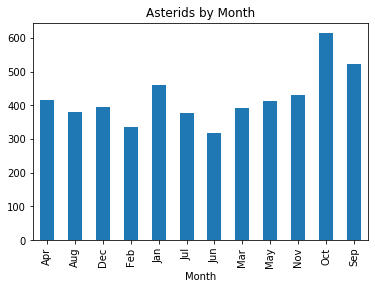

In [175]:
Asteroids_Months_all=Asteroids.groupby("Month")

ALL_count_2=Asteroids_Months_all["ID"].nunique()


ALLAbyMon=ALL_count_2.plot(kind="bar", title="Asterids by Month")

In [108]:
single_asteroid=Asteroids.drop_duplicates("ID",keep='first')
single_asteroid.count()

Date                       4510
Month                      4510
Day                        4510
ID                         4510
Name                       4510
Absolute Magnitude         4510
Relative Velocity (k/s)    4510
Close Approach Date        4510
Estimated Max Diameter     4510
Estimated Min Diameter     4510
Potentially Hazardous?     4510
Miss Distance (km)         4510
Orbiting Body              4510
dtype: int64

In [109]:
Asteroids.count()

Date                       5049
Month                      5049
Day                        5049
ID                         5049
Name                       5049
Absolute Magnitude         5049
Relative Velocity (k/s)    5049
Close Approach Date        5049
Estimated Max Diameter     5049
Estimated Min Diameter     5049
Potentially Hazardous?     5049
Miss Distance (km)         5049
Orbiting Body              5049
dtype: int64

In [110]:
Pos_Hazard=single_asteroid.loc[single_asteroid["Potentially Hazardous?"] == True]
Pos_Hazard

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.9,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
8,1/01/2019,Jan,1,2527715,527715 (2007 YQ56),19.9,15.429488,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
32,3/01/2019,Jan,3,2357022,357022 (1999 YG3),19.0,25.901881,3/01/2019,0.941976,0.421265,True,4.865035e+07,Earth
38,4/01/2019,Jan,4,3263453,(2004 XP14),19.4,17.176591,4/01/2019,0.783502,0.350393,True,1.093730e+07,Earth
55,5/01/2019,Jan,5,2267729,267729 (2003 FC5),18.3,13.317079,5/01/2019,1.300289,0.581507,True,3.724010e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,26/12/2019,Dec,26,2310442,310442 (2000 CH59),19.9,12.273016,26/12/2019,0.622358,0.278327,True,7.291408e+06,Earth
4990,27/12/2019,Dec,27,2267221,267221 (2001 AD2),19.7,25.924487,27/12/2019,0.682402,0.305179,True,2.097858e+07,Earth
4996,28/12/2019,Dec,28,2136849,136849 (1998 CS1),17.6,32.012844,28/12/2019,1.794899,0.802703,True,6.997161e+07,Earth
5003,28/12/2019,Dec,28,3893728,(2019 WX4),21.0,17.719711,28/12/2019,0.375008,0.167708,True,4.165681e+07,Earth


In [111]:
mean_mag=Pos_Hazard["Absolute Magnitude"].mean()
mean_Rvel=Pos_Hazard["Relative Velocity (k/s)"].mean()

<BarContainer object of 409 artists>

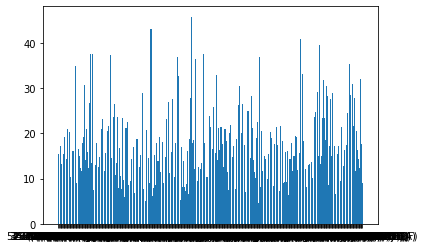

In [112]:
plt.bar(Pos_Hazard["Name"], Pos_Hazard["Relative Velocity (k/s)"])

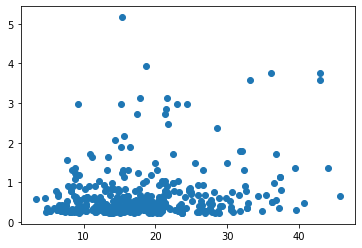

In [113]:
plt.scatter(Pos_Hazard["Relative Velocity (k/s)"], Pos_Hazard["Estimated Max Diameter"])

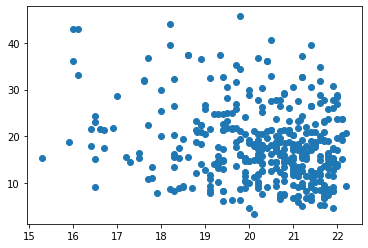

In [114]:
plt.scatter(Pos_Hazard["Absolute Magnitude"], Pos_Hazard["Relative Velocity (k/s)"])

Text(0.5, 0, 'Est. Max Dia')

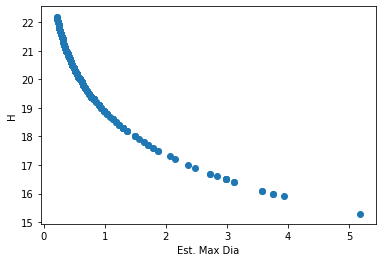

In [133]:
plt.scatter(Pos_Hazard["Estimated Max Diameter"], Pos_Hazard["Absolute Magnitude"])
plt.ylabel("H")
plt.xlabel("Est. Max Dia")

In [118]:
Pos_Hazard

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
2,1/01/2019,Jan,1,3398652,(2007 YQ56),19.9,15.429487,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
8,1/01/2019,Jan,1,2527715,527715 (2007 YQ56),19.9,15.429488,1/01/2019,0.622358,0.278327,True,1.144099e+07,Earth
32,3/01/2019,Jan,3,2357022,357022 (1999 YG3),19.0,25.901881,3/01/2019,0.941976,0.421265,True,4.865035e+07,Earth
38,4/01/2019,Jan,4,3263453,(2004 XP14),19.4,17.176591,4/01/2019,0.783502,0.350393,True,1.093730e+07,Earth
55,5/01/2019,Jan,5,2267729,267729 (2003 FC5),18.3,13.317079,5/01/2019,1.300289,0.581507,True,3.724010e+07,Earth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,26/12/2019,Dec,26,2310442,310442 (2000 CH59),19.9,12.273016,26/12/2019,0.622358,0.278327,True,7.291408e+06,Earth
4990,27/12/2019,Dec,27,2267221,267221 (2001 AD2),19.7,25.924487,27/12/2019,0.682402,0.305179,True,2.097858e+07,Earth
4996,28/12/2019,Dec,28,2136849,136849 (1998 CS1),17.6,32.012844,28/12/2019,1.794899,0.802703,True,6.997161e+07,Earth
5003,28/12/2019,Dec,28,3893728,(2019 WX4),21.0,17.719711,28/12/2019,0.375008,0.167708,True,4.165681e+07,Earth


In [157]:

#plt.pie(Asteroids["Potentially Hazardous?"])

In [119]:
mean_mag=Pos_Hazard["Absolute Magnitude"].mean()
mean_Rvel=Pos_Hazard["Relative Velocity (k/s)"].mean()
mean_dia=Pos_Hazard["Estimated Max Diameter"].mean()


In [135]:
max_mag=Pos_Hazard["Absolute Magnitude"].max()
max_Rvel=Pos_Hazard["Relative Velocity (k/s)"].max()
max_dia=Pos_Hazard["Estimated Max Diameter"].max()
min_miss_dis=Pos_Hazard["Miss Distance (km)"].min()


In [125]:
Largest_Asteroid=Pos_Hazard.loc[Pos_Hazard["Estimated Max Diameter"]== max_dia]
Largest_Asteroid

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
3080,31/08/2019,Aug,31,2001620,1620 Geographos (1951 RA),15.3,15.283542,31/08/2019,5.176545,2.315021,True,20533455.84,Earth


In [129]:
Closest_Asteroid=Pos_Hazard.loc[Pos_Hazard["Miss Distance (km)"]== min_miss_dis]
Closest_Asteroid

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body
4422,13/11/2019,Nov,13,3888754,(2019 UN12),22.0,28.816397,13/11/2019,0.236614,0.105817,True,1437917.792,Earth


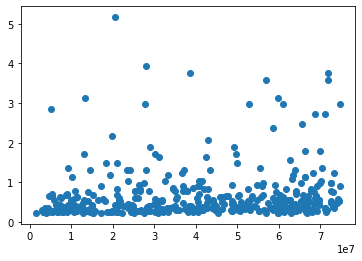

In [130]:
plt.scatter(Pos_Hazard["Miss Distance (km)"], Pos_Hazard["Estimated Max Diameter"])

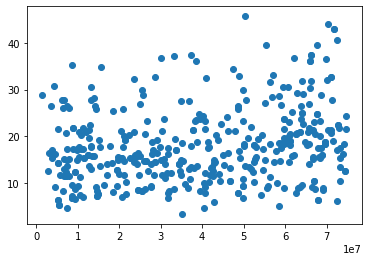

In [131]:
plt.scatter(Pos_Hazard["Miss Distance (km)"], Pos_Hazard["Relative Velocity (k/s)"])


In [160]:
Orbits=Asteroids.loc[Asteroids["Orbiting Body"] != "Earth"]
Orbits

,Date,Month,Day,ID,Name,Absolute Magnitude,Relative Velocity (k/s),Close Approach Date,Estimated Max Diameter,Estimated Min Diameter,Potentially Hazardous?,Miss Distance (km),Orbiting Body


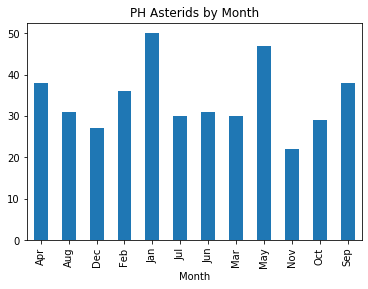

In [171]:
Asteroids_Months=Pos_Hazard.groupby("Month")

A_count=Asteroids_Months["ID"].nunique()


AbyMon=A_count.plot(kind="bar", title="PH Asterids by Month")
# drugs= drug_group["Drug Regimen"].unique()
# mouse_count = drug_group["Mouse ID"].nunique()

# mouse_count_chart=mouse_count.plot(kind="bar", title="Mice Per Treatment (pd)")
# mouse_count_chart.set_ylabel=('Number of mice')
